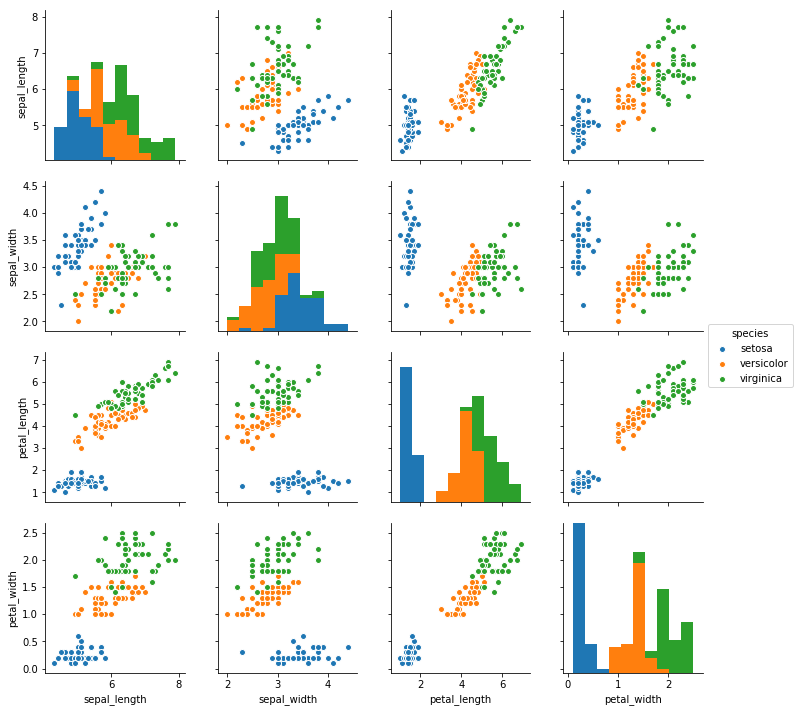

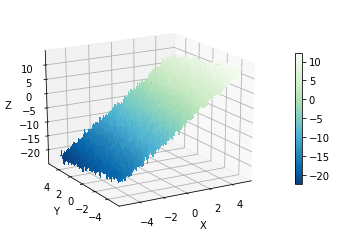

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.997e+05
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        21:10:56   Log-Likelihood:                -14501.
No. Observations:               10201   AIC:                         2.901e+04
Df Residuals:                   10198   BIC:                         2.903e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9975      0.010   -503.369      0.0

In [2]:
'''Multiple Regression
- Shows how to calculate the best fit to a plane in 3D, and how to find the
  corresponding statistical parameters.
- Demonstrates how to make a 3d plot.
- Example of multiscatterplot, for visualizing correlations in three- to
  six-dimensional datasets.
'''

# Copyright(c) 2015, Thomas Haslwanter. All rights reserved, under the CC BY-SA 4.0 International License

# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# additional packages
import sys
import os
sys.path.append(os.path.join('..', '..', 'Utilities'))

try:
# Import formatting commands if directory "Utilities" is available
    from ISP_mystyle import showData 
    
except ImportError:
# Ensure correct performance otherwise
    def showData(*options):
        plt.show()
        return

# additional packages ...
# ... for the 3d plot ...
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# ... and for the statistic
from statsmodels.formula.api import ols

def generateData():
    ''' Generate and show the data: a plane in 3D '''
    
    x = np.linspace(-5,5,101)
    (X,Y) = np.meshgrid(x,x)
    
    # To get reproducable values, I provide a seed value
    np.random.seed(987654321)   
    
    Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])
    
    # Set the color
    myCmap = cm.GnBu_r
    
    # If you want a colormap from seaborn use:
    #from matplotlib.colors import ListedColormap
    #myCmap = ListedColormap(sns.color_palette("Blues", 20))
    
    # Plot the figure
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X,Y,Z, cmap=myCmap, rstride=2, cstride=2, 
        linewidth=0, antialiased=False)
    ax.view_init(20,-120)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.colorbar(surf, shrink=0.6)
    
    outFile = '3dSurface.png'
    showData(outFile)
    
    
    return (X.flatten(),Y.flatten(),Z.flatten())

def regressionModel(X,Y,Z):
    '''Multilinear regression model, calculating fit, P-values, confidence intervals etc.'''
    
    # Convert the data into a Pandas DataFrame
    df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})
    
    # --- >>> START stats <<< ---
    # Fit the model
    model = ols("z ~ x + y", df).fit()
    
    # Print the summary
    print((model.summary()))
    # --- >>> STOP stats <<< ---
    
    return model._results.params  # should be array([-4.99754526,  3.00250049, -0.50514907])

def linearModel(X,Y,Z):
    '''Just fit the plane, using the tools from numpy'''
    
    # --- >>> START stats <<< ---
    M = np.vstack((np.ones(len(X)), X, Y)).T
    bestfit = np.linalg.lstsq(M,Z)
    # --- >>> STOP stats <<< ---

    print(('Best fit plane:', bestfit))
    
    return bestfit
                  
def scatterplot():
    '''Fancy scatterplots, using the package "seaborn" '''
    
    df = sns.load_dataset("iris")
    sns.pairplot(df, hue="species", size=2.5)    
    showData('multiScatterplot.png')
    
if __name__ == '__main__':
    scatterplot()
    (X,Y,Z) = generateData()    
    regressionModel(X,Y,Z)    
    linearModel(X,Y,Z)
